Saving superstore.csv to superstore.csv


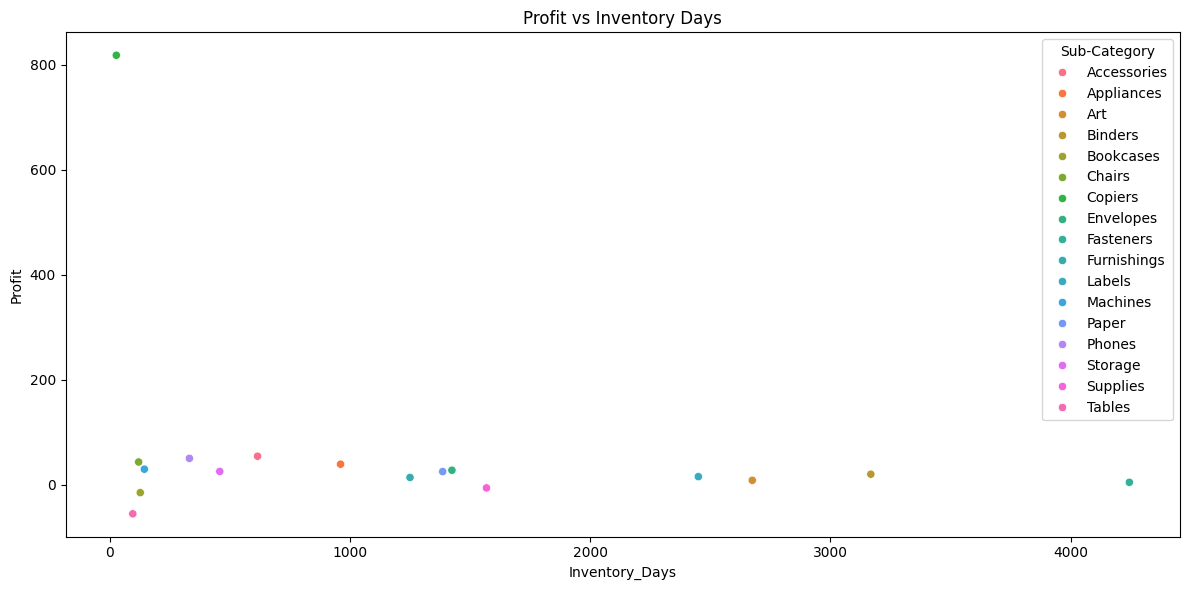

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file
uploaded = files.upload()

# Read file safely with encoding fallback
df = pd.read_csv('superstore.csv', encoding='latin1')

# Calculate basic metrics
category_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
category_profit['Profit_Margin_%'] = round(category_profit['Profit'] * 100 / category_profit['Sales'], 2)

subcat_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()
subcat_profit['Profit_Margin_%'] = round(subcat_profit['Profit'] * 100 / subcat_profit['Sales'], 2)

# Inventory estimate
df['Inventory_Days'] = df['Quantity'] / (df['Sales'] / len(df))
grouped = df.groupby('Sub-Category')[['Profit', 'Inventory_Days']].mean().reset_index()

# Plot: Profit vs Inventory Days
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x='Inventory_Days', y='Profit', hue='Sub-Category')
plt.title('Profit vs Inventory Days')
plt.tight_layout()
plt.savefig('profit_inventory_plot.png')
plt.show()

# Save results
category_profit.to_csv('category_profit.csv')
subcat_profit.to_csv('subcat_profit.csv')
files.download('category_profit.csv')
files.download('subcat_profit.csv')
files.download('profit_inventory_plot.png')